In [132]:
#import necessary libraries

import pandas as pd

import numpy as np

import re


#for removing punctuation
import string


#for spelling correction
from textblob import TextBlob


#for stopwords
import nltk
from nltk.corpus import stopwords


#for replace emojis
import emoji

#for tokenization
from nltk.tokenize import word_tokenize,sent_tokenize

#for tokenization
import spacy

#for stemming
from nltk.stem.porter import PorterStemmer

#for lemmatization
from nltk.stem import WordNetLemmatizer



In [112]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 9.5 MB/s eta 0:00:00


In [8]:
df=pd.read_csv('/IMDB Dataset.csv')


In [9]:

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#Data Cleaning

In [10]:
#total rows & columns of the data

df.shape

(50000, 2)

In [12]:
# basic information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [13]:

df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [14]:
#checking unique categories of data

df.sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [18]:
#total null value

df.isnull().sum()

,0
review,0
sentiment,0


In [19]:
#total duplicate value

df.duplicated().sum()

np.int64(418)

In [22]:
#removing duplicate

df.drop_duplicates(inplace=True)

In [24]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [25]:
#checking duplicates again
df.duplicated().sum()

np.int64(0)

In [27]:
df.shape

(49582, 2)

<Axes: ylabel='count'>

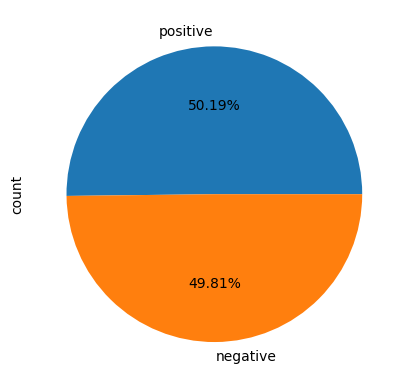

In [30]:
df['sentiment'].value_counts().plot(kind='pie',autopct='%1.2f%%')

# Data Preprocessing




# 1. Conversion of Data to Lower Case:
Benifits:
* Uniformity: Makes all words consistent (e.g., “Apple”, “APPLE”, and “apple”   become the same).
* Reduce vocabulary size: Fewer unique tokens → faster and more efficient model
training.
* Improves performance: Removes unnecessary case-related noise for most NLP tasks.
* Avoid duplication: Prevents treating the same word with different cases as separate words.


In [31]:
df['review']=df['review'].str.lower()

In [33]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# 2. Removing html Tags

In [37]:
from ast import pattern
#function for remove html tags

def remove_html(text):
  pattern=re.compile('<.*?>')
  return pattern.sub(r'',text)


In [38]:
# test on example
text="<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p></p> Click here to <a hr"

remove_html(text)

' Movie 1 Actor - Aamir Khan Click here to <a hr'

In [42]:
df['review']=df['review'].apply(remove_html)

In [44]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# 3. Remove URLS

In [45]:
# remove url's from text

def remove_url(text):
  pattern=re.compile(r'https?://\S+|www\.\S+')

  return pattern.sub(r'',text)

In [46]:
text='iam waching movie from https://www.youtube.com/  and https://web.whatsapp.com/'

remove_url(text)

'iam waching movie from   and '

In [47]:
df['review']=df['review'].apply(remove_url)

In [49]:
df['review'][4]

'petter mattei\'s "love in the time of money" is a visually stunning film to watch. mr. mattei offers us a vivid portrait about human relations. this is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. this being a variation on the arthur schnitzler\'s play about the same theme, the director transfers the action to the present time new york where all these different characters meet and connect. each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. stylishly, the film has a sophisticated luxurious look. we are taken to see how these people live and the world they live in their own habitat.the only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. a big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we 

## 4. Remove Punctuations:

# Reason:
* Reduce noise: they don’t add meaning in most tasks.
* keyboard_arrow_down
* Lower vocabulary size: avoids treating “word” and “word.” as different.
* Improve model performance: cleaner and faster training.


In [52]:
#calling punctuation method from string

exclude=string.punctuation

print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [53]:
#removing punctuations

def remove_punctuation(text):
  return text.translate(str.maketrans('','',exclude))



* str.maketrans('', '', exclude) → creates a table telling which chars to remove
(punctuations).
* text.translate() → applies that rule and deletes all punctuations from the text.

In [54]:
text='my name is $$$$ and our country name is @usa !!!!!! '

remove_punctuation(text)

'my name is  and our country name is usa  '

In [55]:
df['review']=df['review'].apply(remove_punctuation)


In [56]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [57]:
df['review'][3]

'basically theres a family where a little boy jake thinks theres a zombie in his closet  his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombieok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing  arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents  descent dialogs as for the shots with jake just ignore them'

#5. Remove Chatwords


In [68]:
#dictionary for chatwords
chatwords = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"
}

In [69]:
def remove_chatword(text):
  new_text=[]

  for word in text.split():
    if word.upper() in chatwords:
      new_text.append(chatwords[word.upper()])
    else:
      new_text.append(word)

  return " ".join(new_text)

In [70]:
#example test
remove_chatword('IMHO he is the best')


'In My Honest/Humble Opinion he is the best'

In [78]:
df['review']=df['review'].apply(remove_chatword)

In [79]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend Te...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the Tears in my eyes of...,positive


In [72]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend Te...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the Tears in my eyes of...,positive


## 6. Spelling Correction

In [74]:
#function for spelling correction

def spell_coorection(text):
  text_correct=TextBlob(text)
  return text_correct.correct().string

In [77]:
text='myi nama is hennryi'

spell_coorection(text)

'my name is henry'

In [155]:
df['review']=df['review'].apply(spell_coorection)

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'list'>

In [ ]:
df.head()

# 7. Removing Stopword:

The words that re help full to make a sentence but haven't any role in sentence meaning
creation. Some tasks in which you don't remove stopwords such as Parts of speech tagging.
> EX : 'a','the','of','my','are', etc....

In [87]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [98]:
#english stopwords list
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [218]:
def remove_stopword(text):
  new_text=[]

  for word in text.split():
    if word.lower() in stopwords.words('english'):
      new_text.append('')

    else:
      new_text.append(word)

  x=new_text[:]
  new_text.clear()
  return " ".join(x)


In [219]:
remove_stopword("Probably my all-time favourite movie, a story of selfless")

'Probably  all-time favourite movie,  story  selfless'

In [222]:
df['review']=df['review'].apply(remove_stopword)


AttributeError: 'list' object has no attribute 'split'

# 8. Handling Emojis:

There are two options to handle emojis.
1. Remove : Remove the emojis from the data.
2. Replace : Replace the emojis with their meaning.

In [114]:
# function for remove emojis

def remove_emoji(text):
  emoji_pattern=re.compile(
      "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed CJK Letters and Months
      "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'',text)

In [115]:
remove_emoji("Hello 😊 World 🌍! This is fun 🎉")


'Hello  World ! This is fun '

In [117]:
#fnction for replace emojis

def replace_emoji(text):
  return emoji.demojize(text)

In [118]:
replace_emoji('Python is 🔥')

'Python is :fire:'

In [120]:
#apply on Data Set ----> replace
df['review']=df['review'].apply(replace_emoji)


# 9. Tokenization

The process of breaking text into smaller parts is known as tokenization.Tokenization is
essential because it breaks text into words/subwords, allowing feature engineering to extract
meaningful numerical features from text.
>There are two types of tokenization:

1. Word Tokenization: Ex : I am a Pakistani. I Love my Country ====> [I,
am, a, Pakistani, I, Love, my, Country]
2. Sentence Tokenization: Ex : I am a Pakistani. I Love my Country ====>
[[I am a Pakistani],[I Love my Country]]



 ## 1. Use pyhon split function directly to tokenize the data

In [121]:
# word tokenization

sent="I am a Pakistani. I Love my Country"

sent.split()

['I', 'am', 'a', 'Pakistani.', 'I', 'Love', 'my', 'Country']

In [122]:
#sentence tokenization

sent="I am a Pakistani. I Love my Country"

sent.split('.')

['I am a Pakistani', ' I Love my Country']

## 2. Regular Expression for Tokenization


In [123]:
sent= ' The car is going 10km faster'

tokens=re.findall("[\w']+",sent)



<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2593302532.py:3: SyntaxWarning: invalid escape sequence '\w'
  tokens=re.findall("[\w']+",sent)


In [124]:
tokens

['The', 'car', 'is', 'going', '10km', 'faster']

## 3. Using nltk Library

In [139]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [140]:
sent= ' The car is going 10km faster'
tokens=word_tokenize(sent)
tokens

['The', 'car', 'is', 'going', '10km', 'faster']

In [141]:
sent= 'The car is going 10km faster'

token=sent_tokenize(sent)

token

['The car is going 10km faster']

## 4. Using Sapcy Library

In [142]:
tokens=spacy.load('en_core_web_sm')

In [144]:
sent= 'The car is going 10km faster'

tokens=tokens(sent)

In [145]:
for token in tokens:
  print(token)

The
car
is
going
10
km
faster


In [203]:
#function for tokenization by nltk

def tokenization(text):
  word_token=word_tokenize(text)

  return word_token

In [205]:
tokenization(" i am pakistani")

['i', 'am', 'pakistani']

In [223]:
#apply on dataset by nltk tokenizer
df['review']=df['review'].apply(tokenization)

TypeError: expected string or bytes-like object, got 'list'

In [ ]:
df.head()

## 10. Stemming & Limmatization:

Stemming is the prcess of reducing "inflection" in words to their root forms such as mapping
a group of words to the same stem even if the stem itself is not a valid word in the language.
This concet is very helpfull in NLP specially in information retrieval systems like GOOGLE.
What is Inflection:
Inflection is the concept in English that means changing the form of a word to express things
like tense, number, gender, or degree — but the core meaning of the word stays the same.
keyboard_arrow_down



>EX:
* cat → cats
* walk → walked → walking
* big → bigger → biggest

In [175]:
#object of porter stemmer

ps=PorterStemmer()

In [176]:
#function for stemming

def stem_word(text):
  return [ps.stem(word) for word in text]



In [177]:
sample=["walk","walks","walking","walked"]
stem_word(sample)


['walk', 'walk', 'walk', 'walk']

In [210]:
df['review']=df['review'].apply(stem_word)


In [180]:
df.head()

,review,sentiment
0,"[one, of, the, other, review, ha, mention, tha...",positive
1,"[a, wonder, littl, product, the, film, techniq...",positive
2,"[i, thought, thi, wa, a, wonder, way, to, spen...",positive
3,"[basic, there, a, famili, where, a, littl, boy...",negative
4,"[petter, mattei, love, in, the, tear, in, my, ...",positive


Note: The stemmed word is not always a valid word, it just chops off the end of words to get
the root form, doesn't care about meaning or grammar.

>Example:
 * “studies” → “studi”
 * “better” → “bett”


Lemmatization converts a word to its base (dictionary) form using vocabulary and grammar
rules

Example:
* “studies” → “study”
* “better” → “good”

But stemming is fast as compare to lemmatization




##wordnet lematization:
wordnet is the lexical dictionary in which all the related words in grammer context are
stored.So we actually search the exact gramatic base word (lemma) in this dictionary


In [179]:
#download wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [196]:
lemitizer=WordNetLemmatizer()

In [197]:
#function for lemmatization

def lemmatize_text(text):

  lemitize_token=[lemitizer.lemmatize(token) for token in text]

  return lemitize_token


In [198]:
#examle test
sent=['I','Like','Playing','Football']

lemmatize_text(sent)

['I', 'Like', 'Playing', 'Football']

In [199]:
#apply on data
df['review'] = df['review'].apply(lemmatize_text)

In [208]:
df.head()

,review,sentiment
0,"[one, of, the, other, review, ha, mention, tha...",positive
1,"[a, wonder, littl, product, the, film, techniq...",positive
2,"[i, thought, thi, wa, a, wonder, way, to, spen...",positive
3,"[basic, there, a, famili, where, a, littl, boy...",negative
4,"[petter, mattei, love, in, the, tear, in, my, ...",positive


In [209]:
df['review'][0]

['one',
 'of',
 'the',
 'other',
 'review',
 'ha',
 'mention',
 'that',
 'after',
 'watch',
 'just',
 '1',
 'oz',
 'episod',
 'youll',
 'be',
 'hook',
 'they',
 'are',
 'right',
 'a',
 'thi',
 'is',
 'exactli',
 'what',
 'happen',
 'with',
 'meth',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'wa',
 'it',
 'brutal',
 'and',
 'unflinch',
 'scene',
 'of',
 'violenc',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'thi',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'heart',
 'or',
 'timid',
 'thi',
 'show',
 'pull',
 'no',
 'punch',
 'with',
 'regard',
 'to',
 'drug',
 'sex',
 'or',
 'violenc',
 'it',
 'is',
 'hardcor',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'wordit',
 'is',
 'call',
 'oz',
 'a',
 'that',
 'is',
 'the',
 'nicknam',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'secur',
 'state',
 'penitentari',
 'it',
 'focus',
 'mainli',
 'on',
 'emerald',
 'citi',
 'an',
 'experiment',
 'section',
 'of